<a href="https://colab.research.google.com/github/PruebasUIS/UIS_web/blob/master/Taller1_Estadistica2_Raysa_Diaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desarrollo de taller 1 Estadistica 2**

In [ ]:
installed.packages()

In [ ]:
pkgs <- installed.packages()
class(pkgs)

In [ ]:
library(dplyr)
pkgs_df <- data.frame(pkgs)
pkgs_df %>% head

/content/sample_data

Base de datos revisada:
https://www.stats.govt.nz/assets/Uploads/Annual-balance-sheets/Annual-balance-sheets-2017-provisional/Download-data/annual-balance-sheets-and-accumulation-accounts-200817-provisional-csv.csv

In [40]:
library(readr)
tabla1 <- read_csv('/content/sample_data/annual-balance-sheets-and-accumulation-accounts-200817-provisional-csv.csv')

Rows: 18720 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Institutional_sector_name, Descriptor, SNA08TRANS, Asset_liability_...
dbl (2): Year, Institutional_sector_code

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Esta base de datos es sobre balances anuales y de cuentas de acumulación que muestran datos desagregados por las siguientes características:
Año
Nombre del sector institucional
Código del sector
Descriptor de la cuenta (Tipos de cuentas)
Código SNA08TRANS
Codigo pasivo activo
Estado
Valor de la cuenta


In [41]:
tabla1 %>% glimpse()

Rows: 18,720
Columns: 8
$ Year                      <dbl> 2008.03, 2009.03, 2010.03, 2011.03, 2012.03,…
$ Institutional_sector_name <chr> "Corporate business enterprises", "Corporate…
$ Institutional_sector_code <dbl> 141, 141, 141, 141, 141, 141, 141, 141, 141,…
$ Descriptor                <chr> "Capital Account Opening balances Produced n…
$ SNA08TRANS                <chr> "LS00000", "LS00000", "LS00000", "LS00000", …
$ Asset_liability_code      <chr> "AN10000", "AN10000", "AN10000", "AN10000", …
$ Status                    <chr> "REVISED", "REVISED", "REVISED", "REVISED", …
$ Values                    <chr> "225544", "243315", "259381", "262596", "267…


Sobre este banco de datos se puede observar que tiene un total de 18.720 registros, de los cuales se puede resaltar que:


En la característica de Código del sector se ven grupos 1040 por cada tipo de código, sin embargo al realizar un histograma no se puede observar la uniformidad por la cercanía de algunos.


In [88]:
table(tabla1$Institutional_sector_code)


   8   27  121  141  211  221  222  231  241  251  261  281  311  312  321  411 
1040 1040 1040 1040 1040 1040 1040 1040 1040 1040 1040 1040 1040 1040 1040 1040 
 511  611 
1040 1040 

Sin embargo, sí se evidencia que la mayor parte de codigos estan en el intervalo de 200-350

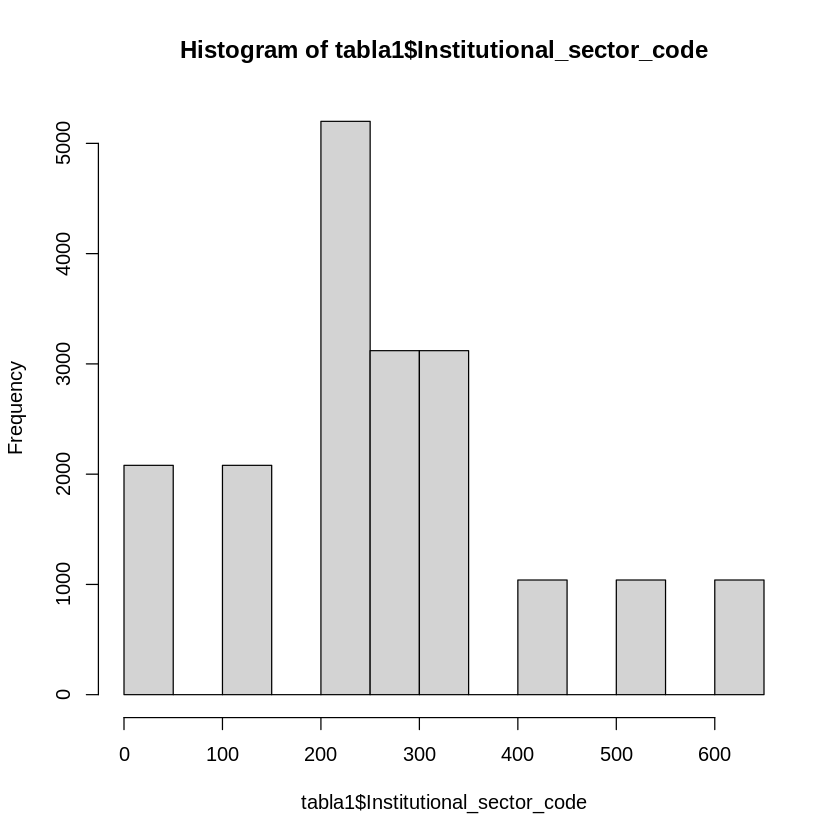

In [95]:
hist(tabla1$Institutional_sector_code)

Lo mismo sucede con el nombre del sector de la cuenta:

In [89]:
table(tabla1$Institutional_sector_name)


                                           Captive financial institutions 
                                                                     1040 
                                                             Central bank 
                                                                     1040 
Central government institutions excluding funded social insurance schemes 
                                                                     1040 
          Central government institutions funded social insurance schemes 
                                                                     1040 
                                           Corporate business enterprises 
                                                                     1040 
                                                    Financial auxiliaries 
                                                                     1040 
                                                               Households 
                        

Para poder encontrar una conclusión sobre las caracteristicas a continuación relacionadas debemos conocer a que se refieren los codigos de las caracteristicas, o a que hacen referencia, pues mas alla de agrupar y sumarlos no se puede dar otra observación sobre el comportamiento de los datos.

SNA08TRANS

Codigo pasivo activo

In [90]:
table(tabla1$SNA08TRANS)


B08N000 B090000 B09C000 B09F000 B102000 B103000 D910000 D990000 F000000 K030000 
    180     180     180     180     180     180     180     180    3240     180 
K050000 K060000 K061000 K062000 K070000 LE00000 LS00000 NP00000 NP01000 NP02000 
    720     180     180     180    3780    3780    3780     180     180     180 
P051000 P051C00 P051G00 P052000 
    180     180     180     180 

In [91]:
table(tabla1$Asset_liability_code)


A000000 AF00000 AFA0000 AFA0100 AFA0200 AFA0300 AFA0400 AFA0500 AFA0600 AFA0700 
    720     720     900     720     720     720     720     720     720     720 
AFA0800 AFL0000 AFL0100 AFL0200 AFL0300 AFL0301 AFL0302 AFL0303 AFL0304 AFL0305 
    720     900     720     720     711       1       1       1       1       1 
AFL0306 AFL0307 AFL0308 AFL0309 AFL0400 AFL0500 AFL0600 AFL0700 AFL0800 AN00000 
      1       1       1       1     720     720     720     720     720     900 
AN10000 AN20000     ISA 
   1260    1080     720 

Las cuentas sobre los balances anuales y de cuentas de acumulación fueron clasificadas como revisadas y cuentas finales, es decir que puede haber cuentas que aun pueden cambiar.

In [93]:
table(tabla1$Status)


  FINAL REVISED 
  13865    4855 

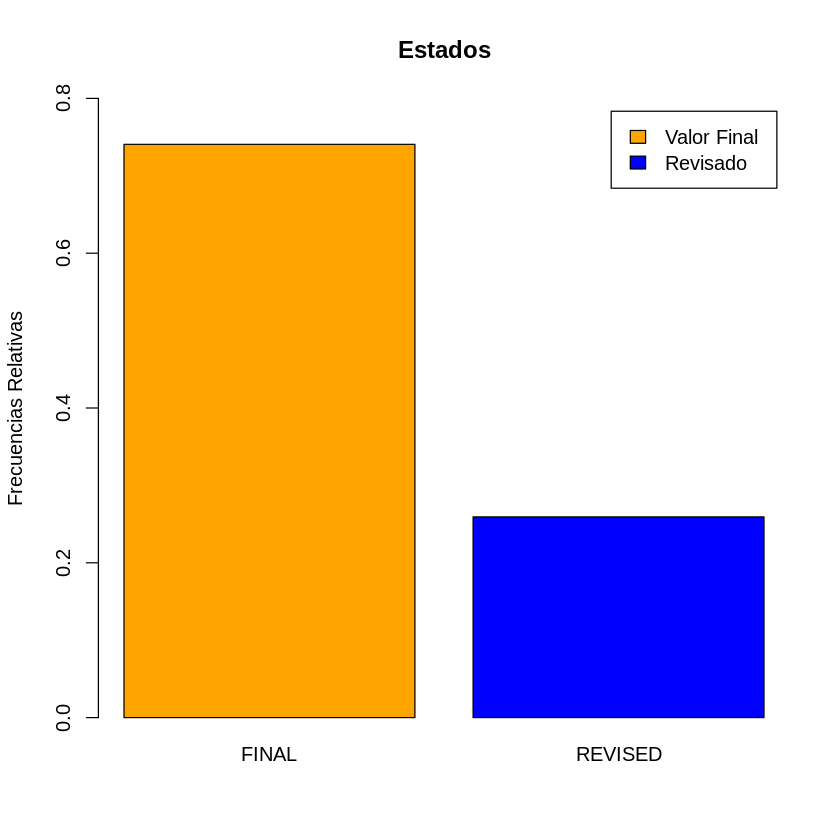

In [62]:
barplot(prop.table(table(tabla1$Status)),col=c("orange","blue"), legend.text=c("Valor Final","Revisado"),ylim=c(0,0.8), main="Estados", ylab ="Frecuencias Relativas")


In [42]:
tabla1 %>% summary()

      Year      Institutional_sector_name Institutional_sector_code
 Min.   :2008   Length:18720              Min.   :  8.0            
 1st Qu.:2010   Class :character          1st Qu.:211.0            
 Median :2013   Mode  :character          Median :246.0            
 Mean   :2013                             Mean   :260.7            
 3rd Qu.:2015                             3rd Qu.:312.0            
 Max.   :2017                             Max.   :611.0            
  Descriptor         SNA08TRANS        Asset_liability_code    Status         
 Length:18720       Length:18720       Length:18720         Length:18720      
 Class :character   Class :character   Class :character     Class :character  
 Mode  :character   Mode  :character   Mode  :character     Mode  :character  
                                                                              
                                                                              
                                                  

Revisando la ultima variable de los valores de las cuentas encontramos que el maximo valor numerico es 2.852.427 y el menor es de -46.318, además que al hacer el summary toma la caracteristica como un Caracter porque hay del total de 18.720 796 registros que se asignaron con S y C, sin embargo, no se explica que quiere decir esta asignación o clasificación. 

Si el dato de los valores totales (revisadas y finales) de las cuentas sin contar con los 796 registros que se asignaron con S y C se podria tener que el promedio sería de 27.868.27 por cuenta, considerando tanto los valores negativos como los positivos.

Para este tipo de analisis sería importante tener a la mano una pequeña descripción de que datos tiene la muestra, ya que al no contar con al menos una relación de lo que hay en cada columna no se pueden generar muchas conclusiones al respecto, por lo menos así elegiriamos mejor el banco de datos y realizar un mejor analsis.